## 3. Baseline with MW (90 pts)

In [1]:
%load_ext autoreload
%autoreload 2

from queries import query_mw as q_mw
from queries import query_client as q_client

from plots.ctrl import generate, dashboard_nc, dashboard_time
from plots import tp, rt

suite={
    "exp31":"simulation_p2",
    "exp32":"simulation_p2"
}

### 3.1 One Middleware

In [2]:
exp_name="exp31"
df_exp31_mw = q_mw.load_df(suite=suite[exp_name], exp=exp_name)
df_exp31_client = q_client.load_df(suite=suite[exp_name], exp=exp_name)

Client: 1 repetitions don't have throughput


In [3]:
#exp_name="exp32_ext"
#dashboard_time(suite="simulation_p2", exp_name=exp_name)


#### Write-Only

C:\Users\nicok\Miniconda3\envs\asl\lib\site-packages\matplotlib\font_manager.py:1241: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


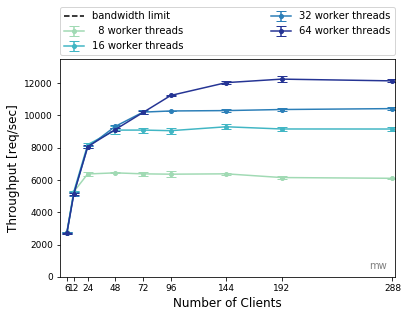

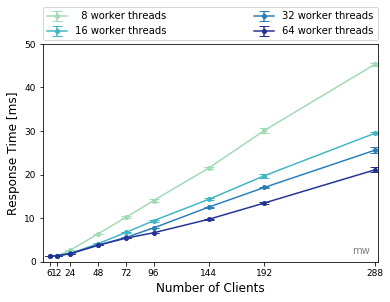

MW: 


n_worker_per_mw          8                                                   \
num_clients             6       12      24      48      72      96      144   
throughput_rep_mean  2779.7  5272.3  6371.9  6440.1  6379.2  6357.8  6379.9   
rt_rep_mean             1.2     1.3     2.7     6.4    10.2    14.0    21.6   
qwt_rep_mean            0.1     0.2     1.4     5.2     8.9    12.8    20.3   

n_worker_per_mw                          16                                  \
num_clients             192     288     6       12      24      48      72    
throughput_rep_mean  6150.0  6102.8  2701.6  5270.1  8189.6  9088.2  9091.1   
rt_rep_mean            30.1    45.4     1.3     1.3     1.9     4.2     6.7   
qwt_rep_mean           28.8    44.0     0.1     0.1     0.4     2.4     4.9   

n_worker_per_mw                                          32                  \
num_clients             96      144     192     288     6       12      24    
throughput_rep_mean  9053.9  9296.0  9158.6  9156.9  2741.6  5150.6  8024.6   
rt_rep_mean             9.4    14.3    19.7    29.5     1.3     1.4     1.9   
qwt_rep_mean            7.6    12.6    18.0    27.7     0.1     0.1     0.3   

n_worker_per_mw                                                           \
num_clients             48       72       96       144      192      288   
throughput_rep_mean  9321.8  10203.6  10275.2  10298.7  10364.8  10420.6   
rt_rep_mean             3.8      5.6      7.8     12.6     17.1     25.6   
qwt_rep_mean            1.0      2.5      4.6      9.4     14.0     22.5   

n_worker_per_mw          64                                            \
num_clients             6       12      24      48       72       96    
throughput_rep_mean  2700.1  5130.6  8066.6  9125.9  10182.3  11236.1   
rt_rep_mean             1.3     1.4     1.9     3.8      5.4      6.7   
qwt_rep_mean            0.1     0.1     0.3     0.6      1.2      2.0   

n_worker_per_mw                                 
num_clients              144      192      288  
throughput_rep_mean  12030.3  12247.8  12139.5  
rt_rep_mean              9.8     13.5     21.1  
qwt_rep_mean             4.6      8.3     15.8

Client: 


n_worker_per_mw          8                                                   \
num_clients             6       12      24      48      72      96      144   
throughput_rep_mean  2752.6  5134.3  6378.3  6532.7  6545.6  6610.9  6090.9   
rt_rep_mean             2.2     2.3     3.8     7.4    11.0    14.5    23.7   

n_worker_per_mw                          16                                  \
num_clients             192     288     6       12      24      48      72    
throughput_rep_mean  5629.0  4840.2  2577.6  5211.9  8123.5  9178.9  9200.7   
rt_rep_mean            32.2    45.9     2.3     2.3     3.0     5.2     7.8   

n_worker_per_mw                                          32                  \
num_clients             96      144     192     288     6       12      24    
throughput_rep_mean  9240.5  9282.4  9356.7  8287.0  2685.8  4947.9  7961.5   
rt_rep_mean            10.4    15.5    20.6    30.8     2.2     2.4     3.0   

n_worker_per_mw                                                           \
num_clients             48       72       96       144      192      288   
throughput_rep_mean  9347.9  10253.7  10350.1  10429.7  10466.0  10575.3   
rt_rep_mean             5.1      7.0      9.2     13.8     18.3     27.2   

n_worker_per_mw          64                                                    \
num_clients             6       12      24      48      72       96       144   
throughput_rep_mean  2659.6  5059.4  7972.4  9084.9  9959.4  11271.8  12144.6   
rt_rep_mean             2.3     2.4     3.0     5.3     7.2      8.5     11.8   

n_worker_per_mw                       
num_clients              192     288  
throughput_rep_mean  11070.2  9723.0  
rt_rep_mean             15.5    22.9

- throughput smaller in clients because includes warmup and cooldown
- rt longer because cannot measure rtt client - mw -client


In [4]:
df_exp31_wo_mw = df_exp31_mw[df_exp31_mw['workload']=='write-only']
df_exp31_wo_c = df_exp31_client[df_exp31_client['workload']=='write-only']

generate(tp.nc_w, df_exp31_wo_mw, suite[exp_name], f"{exp_name}_wo_tp_nc_w")
generate(rt.nc_w, df_exp31_wo_mw, suite[exp_name], f"{exp_name}_wo_rt_nc_w")

print("MW: ")
display(df_exp31_wo_mw[['n_worker_per_mw', 'num_clients', 'throughput_rep_mean','rt_rep_mean', 'qwt_rep_mean']].sort_values(['n_worker_per_mw', 'num_clients']).set_index(['n_worker_per_mw','num_clients']).transpose().round(1))

print("Client: ")
display(df_exp31_wo_c[['n_worker_per_mw', 'num_clients', 'throughput_rep_mean','rt_rep_mean']].sort_values(['n_worker_per_mw', 'num_clients']).set_index(['n_worker_per_mw','num_clients']).transpose().round(1))

print("- throughput smaller in clients because includes warmup and cooldown")
print("- rt longer because cannot measure rtt client - mw -client")

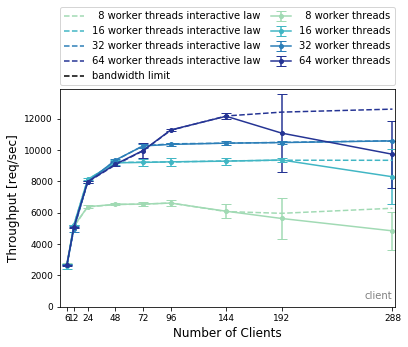

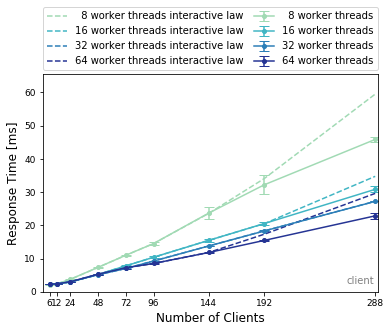

In [5]:
generate(tp.nc_w, df_exp31_wo_c)
generate(rt.nc_w, df_exp31_wo_c)

#### Read-Only

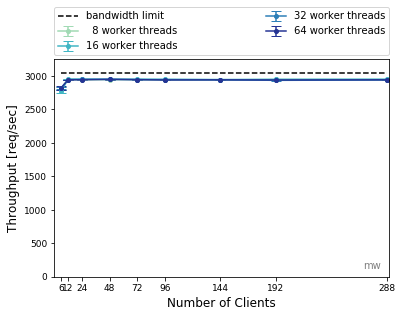

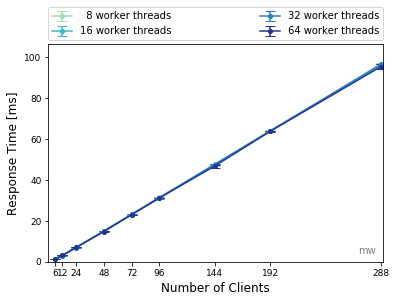

In [6]:
df_exp31_ro_mw = df_exp31_mw[df_exp31_mw['workload']=='read-only']

generate(tp.nc_w, df_exp31_ro_mw, suite[exp_name], f"{exp_name}_ro_tp_nc_w") # throughput vs num_clients plot
generate(rt.nc_w, df_exp31_ro_mw, suite[exp_name], f"{exp_name}_ro_rt_nc_w") # response time vs num_clients plot

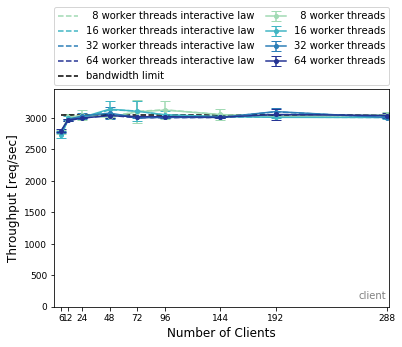

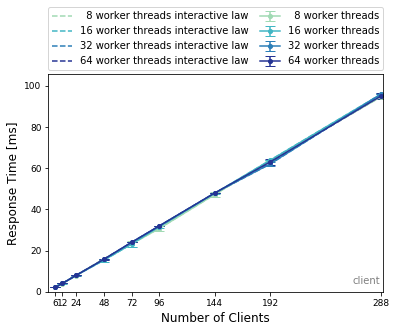

In [7]:
df_exp31_ro_c = df_exp31_client[df_exp31_client['workload']=='read-only']

generate(tp.nc_w, df_exp31_ro_c)
generate(rt.nc_w, df_exp31_ro_c)

#### 3.1.1 Explanation

Write Only: 


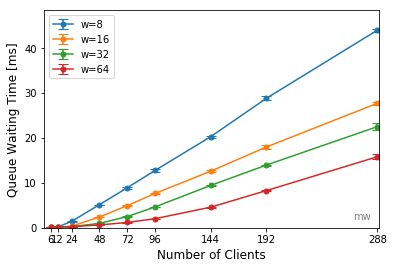

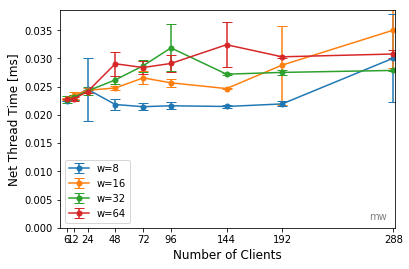

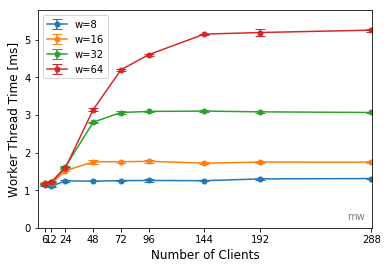

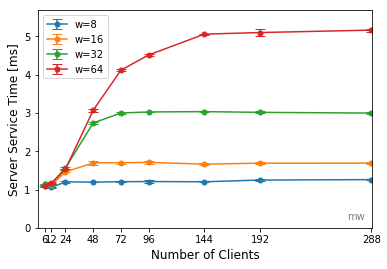

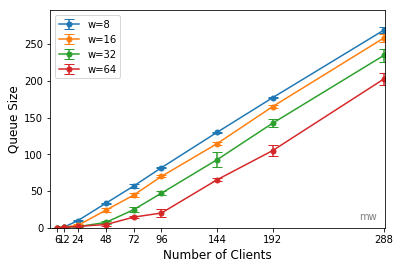

Read Only: 


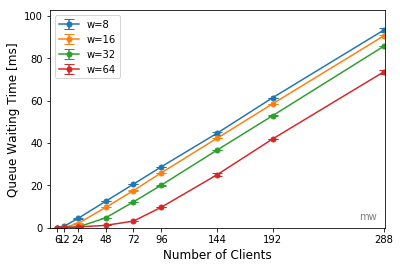

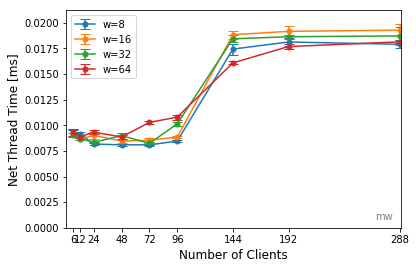

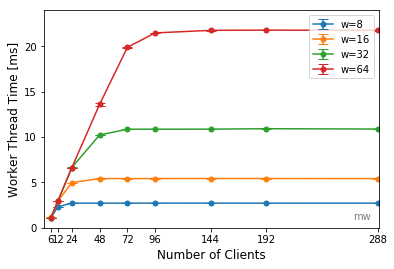

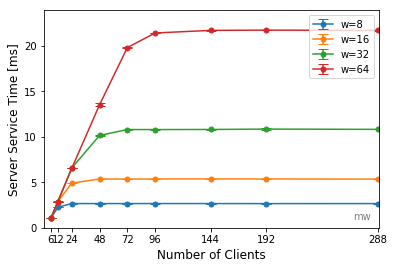

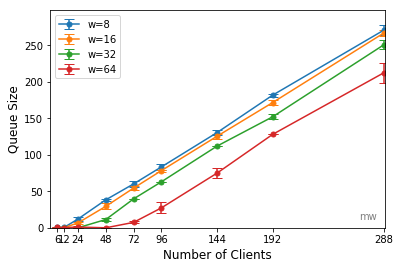

In [168]:
print("Write Only: ")
dashboard_nc(df_exp31_wo_mw)

print("Read Only: ")
dashboard_nc(df_exp31_ro_mw)

### 3.2 Two Middlewares

In [8]:
exp_name="exp32"
df_exp32_mw = q_mw.load_df(suite=suite[exp_name], exp=exp_name)
df_exp32_client = q_client.load_df(suite=suite[exp_name], exp=exp_name)



Client: 0 repetitions don't have throughput


n_w=8   op_type=set  num_clients=384   mget_size=-


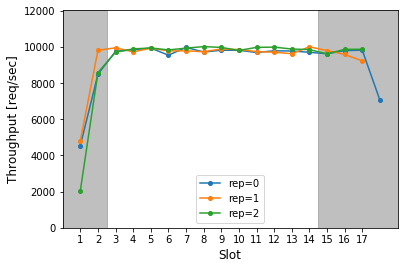

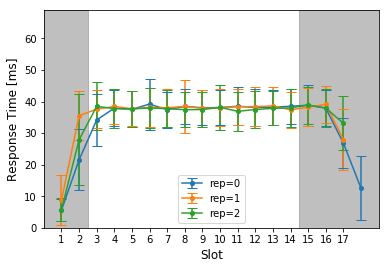

n_w=8   op_type=set  num_clients=480   mget_size=-


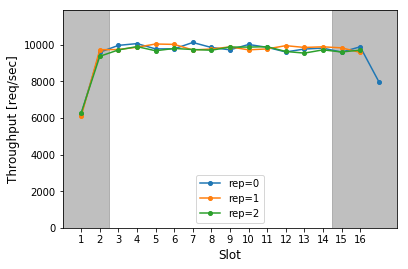

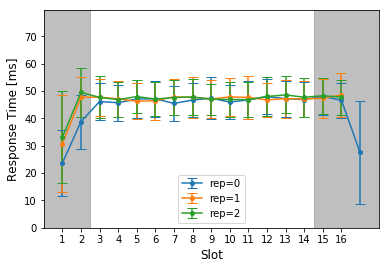

n_w=16   op_type=set  num_clients=384   mget_size=-


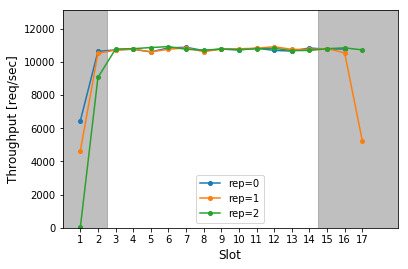

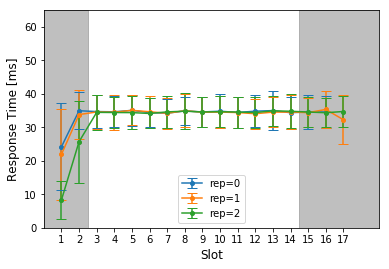

n_w=16   op_type=set  num_clients=480   mget_size=-


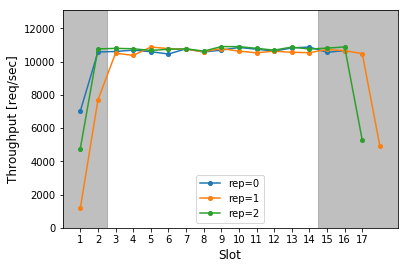

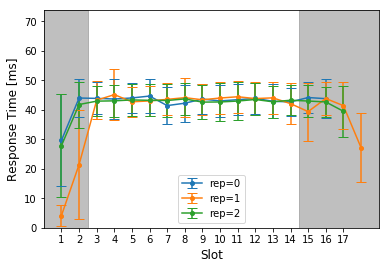

n_w=32   op_type=set  num_clients=384   mget_size=-


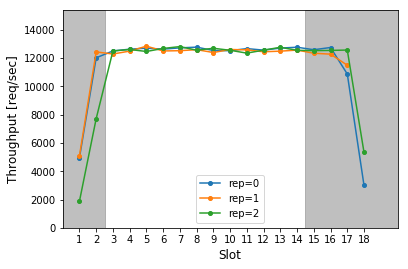

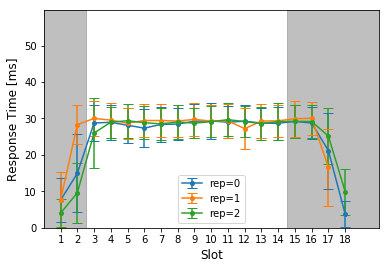

n_w=32   op_type=set  num_clients=480   mget_size=-


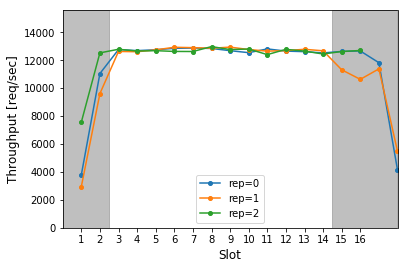

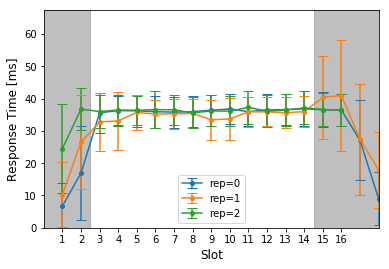

n_w=64   op_type=set  num_clients=384   mget_size=-


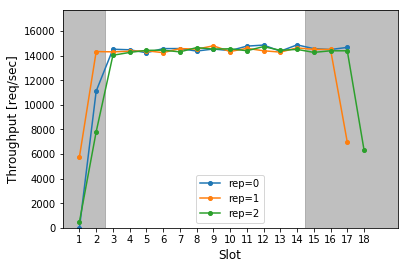

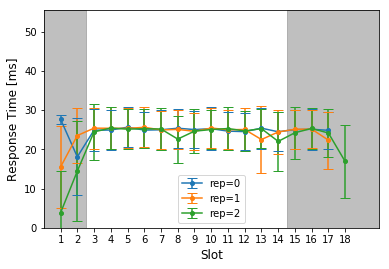

n_w=64   op_type=set  num_clients=480   mget_size=-


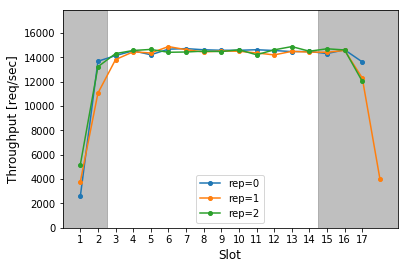

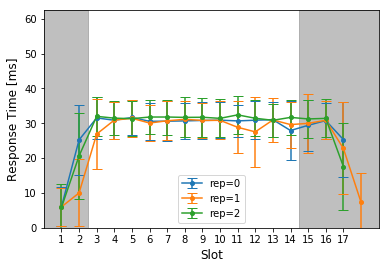

In [216]:
exp_name="exp32ext"
dashboard_time(suite="simulation_p2", exp_name=exp_name)

#### Write-Only

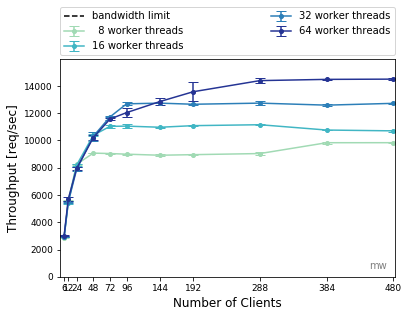

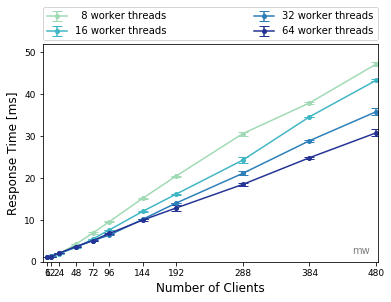

In [9]:
df_exp32_wo_mw = df_exp32_mw[df_exp32_mw['workload']=='write-only']

generate(tp.nc_w, df_exp32_wo_mw, suite[exp_name], f"{exp_name}_wo_tp_nc_w") 
generate(rt.nc_w, df_exp32_wo_mw, suite[exp_name], f"{exp_name}_wo_rt_nc_w") 

,num_clients,data_origin,n_server_vm,n_client_vm,n_vc,workload,workload_ratio,op_type,multi_get_behaviour,multi_get_size,n_worker_per_mw,n_middleware_vm,n_instances_mt_per_machine,n_threads_per_mt_instance,write_bandwidth_limit,bandwidth_limit_write_throughput,read_bandwidth_limit,bandwidth_limit_read_throughput,client_rtt,server_rtt,throughput_rep_mean,throughput_rep_std,rt_rep_mean,rt_rep_std,throughputset_rep_mean,throughputset_rep_std,rtset_rep_mean,rtset_rep_std,throughputget_rep_mean,throughputget_rep_std,rtget_rep_mean,rtget_rep_std
0,6,client,1,3,1,read-only,0:1,get,-,-,8,2,2,1,598.2,18255.615234,100.15,3056.335449,1.270500,1.367,2826.870000,16.153492,2.140556,0.012285,0.000000,0.000000,0.000000,0.000000,2826.870000,16.153492,2.140556,0.012285
1,6,client,1,3,1,read-only,0:1,get,-,-,16,2,2,1,598.2,18255.615234,100.15,3056.335449,1.270500,1.367,2799.420000,27.750991,2.162778,0.029171,0.000000,0.000000,0.000000,0.000000,2799.420000,27.750991,2.162778,0.029171
2,6,client,1,3,1,read-only,0:1,get,-,-,32,2,2,1,598.2,18255.615234,100.15,3056.335449,1.270500,1.367,2837.990000,33.578605,2.132222,0.027605,0.000000,0.000000,0.000000,0.000000,2837.990000,33.578605,2.132222,0.027605
3,6,client,1,3,1,read-only,0:1,get,-,-,64,2,2,1,598.2,18255.615234,100.15,3056.335449,1.270500,1.367,2844.816667,13.877472,2.118333,0.007638,0.000000,0.000000,0.000000,0.000000,2844.816667,13.877472,2.118333,0.007638
4,6,client,1,3,1,write-only,1:0,set,-,-,8,2,2,1,598.2,18255.615234,100.15,3056.335449,1.270500,1.367,2843.090000,30.721062,2.119583,0.023624,2843.090000,30.721062,2.119583,0.023624,0.000000,0.000000,0.000000,0.000000
5,6,client,1,3,1,write-only,1:0,set,-,-,16,2,2,1,598.2,18255.615234,100.15,3056.335449,1.270500,1.367,2904.016667,26.946468,2.071667,0.020817,2904.016667,26.946468,2.071667,0.020817,0.000000,0.000000,0.000000,0.000000
6,6,client,1,3,1,write-only,1:0,set,-,-,32,2,2,1,598.2,18255.615234,100.15,3056.335449,1.270500,1.367,2815.365714,56.190813,2.143571,0.044069,2815.365714,56.190813,2.143571,0.044069,0.000000,0.000000,0.000000,0.000000
7,6,client,1,3,1,write-only,1:0,set,-,-,64,2,2,1,598.2,18255.615234,100.15,3056.335449,1.270500,1.367,2965.170000,6.016502,2.042222,0.004194,2965.170000,6.016502,2.042222,0.004194,0.000000,0.000000,0.000000,0.000000
8,12,client,1,3,2,read-only,0:1,get,-,-,8,2,2,1,598.2,18255.615234,100.15,3056.335449,1.270500,1.367,2997.363333,11.396106,4.024444,0.011097,0.000000,0.000000,0.000000,0.000000,2997.363333,11.396106,4.024444,0.011097
9,12,client,1,3,2,read-only,0:1,get,-,-,16,2,2,1,598.2,18255.615234,100.15,3056.335449,1.270500,1.367,2995.846667,8.310513,4.027222,0.020092,0.000000,0.000000,0.000000,0.000000,2995.846667,8.310513,4.027222,0.020092


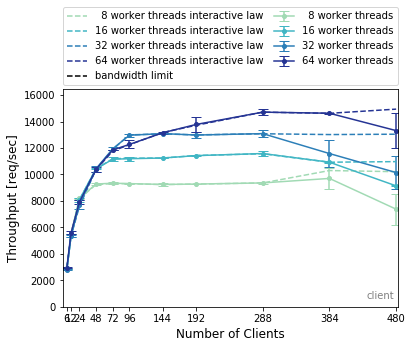

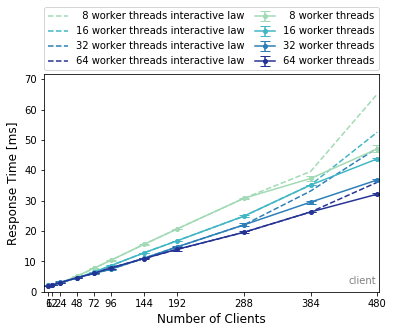

In [232]:
df_exp32_wo_c = df_exp32_client[df_exp32_client['workload']=='write-only']

display(df_exp32_client)

generate(tp.nc_w, df_exp32_wo_c)
generate(rt.nc_w, df_exp32_wo_c)

#### Read-Only

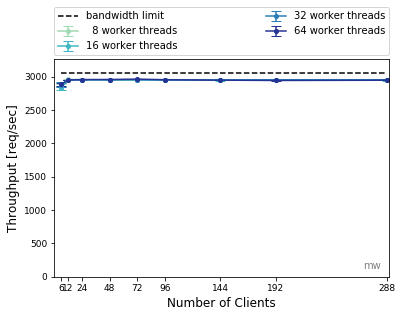

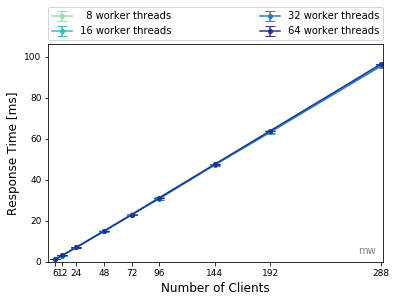

In [10]:
df_exp32_ro_mw = df_exp32_mw[df_exp32_mw['workload']=='read-only']

generate(tp.nc_w, df_exp32_ro_mw, suite[exp_name], f"{exp_name}_ro_tp_nc_w") 
generate(rt.nc_w, df_exp32_ro_mw, suite[exp_name], f"{exp_name}_ro_rt_nc_w")

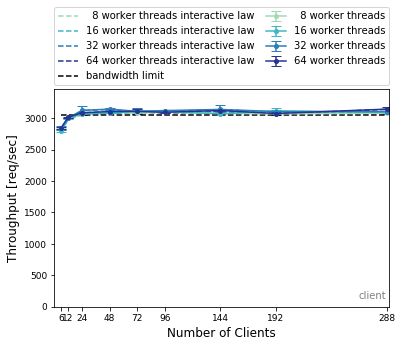

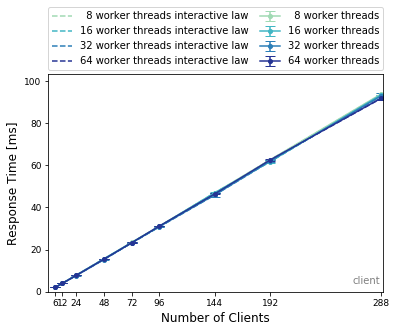

In [11]:
df_exp32_ro_c = df_exp32_client[df_exp32_client['workload']=='read-only']

generate(tp.nc_w, df_exp32_ro_c)
generate(rt.nc_w, df_exp32_ro_c)

#### 3.2.1 Explanation

Write Only: 


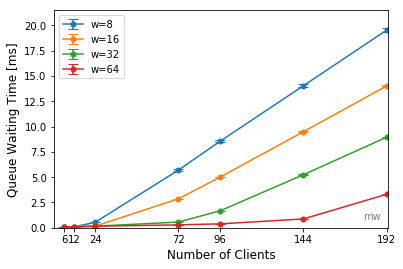

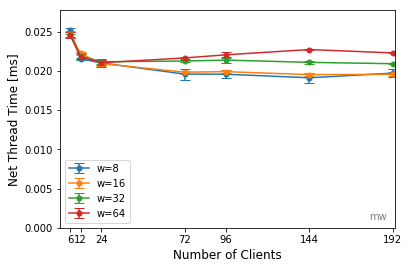

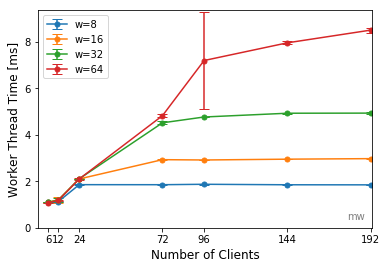

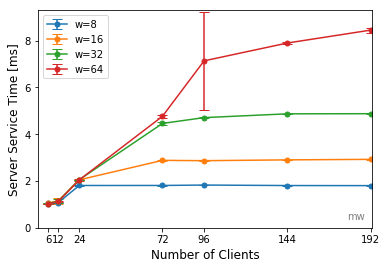

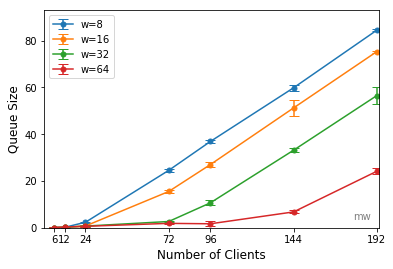

Read Only: 


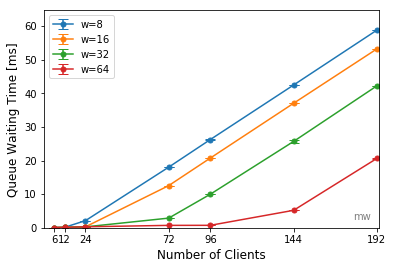

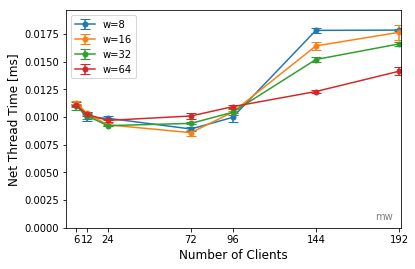

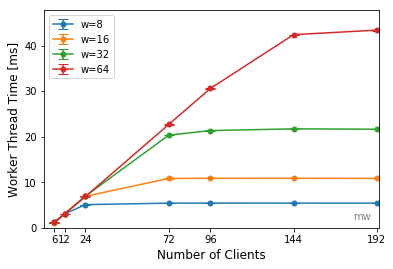

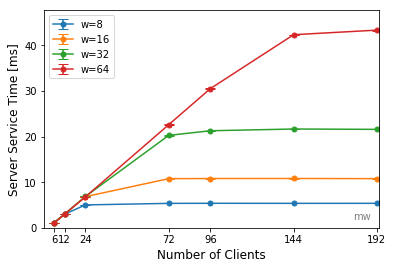

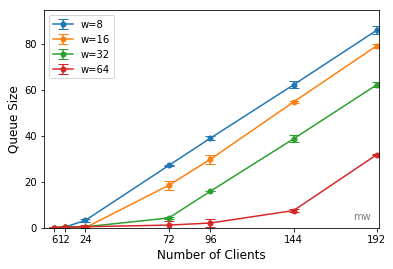

In [14]:
print("Write Only: ")
dashboard_nc(df_exp32_wo_mw)

print("Read Only: ")
dashboard_nc(df_exp32_ro_mw)

### 3.3 Summary